# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    • Which variables are significant in predicting the demand for shared bikes.
    • How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

---------------------------------------------------------------------------------------------------------------------------

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import itertools
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings   # To suppress warnings
warnings.filterwarnings("ignore")

---------------------------------------------------------------------------------------------------------------------------

# Importing the dataset

In [2]:
bk = pd.read_csv("Downloads/day.csv")
bk

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


---------------------------------------------------------------------------------------------------------------------------

# Understanding the Data

In [3]:
bk.shape #Number of rows and columns in the dataset

(730, 16)

In [4]:
bk.info("all") #Checking information of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are 16 columns having various data types like object, int, float and 730 rows.

In [5]:
bk.describe() # Checking the numeric variables of the dataframes

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


---------------------------------------------------------------------------------------------------------------------------

# Data Cleaning

### Missing Values

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(((bk.isna().mean())*100).sort_values(ascending = False)) #Checking the percentage of null values in each column

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


<Axes: >

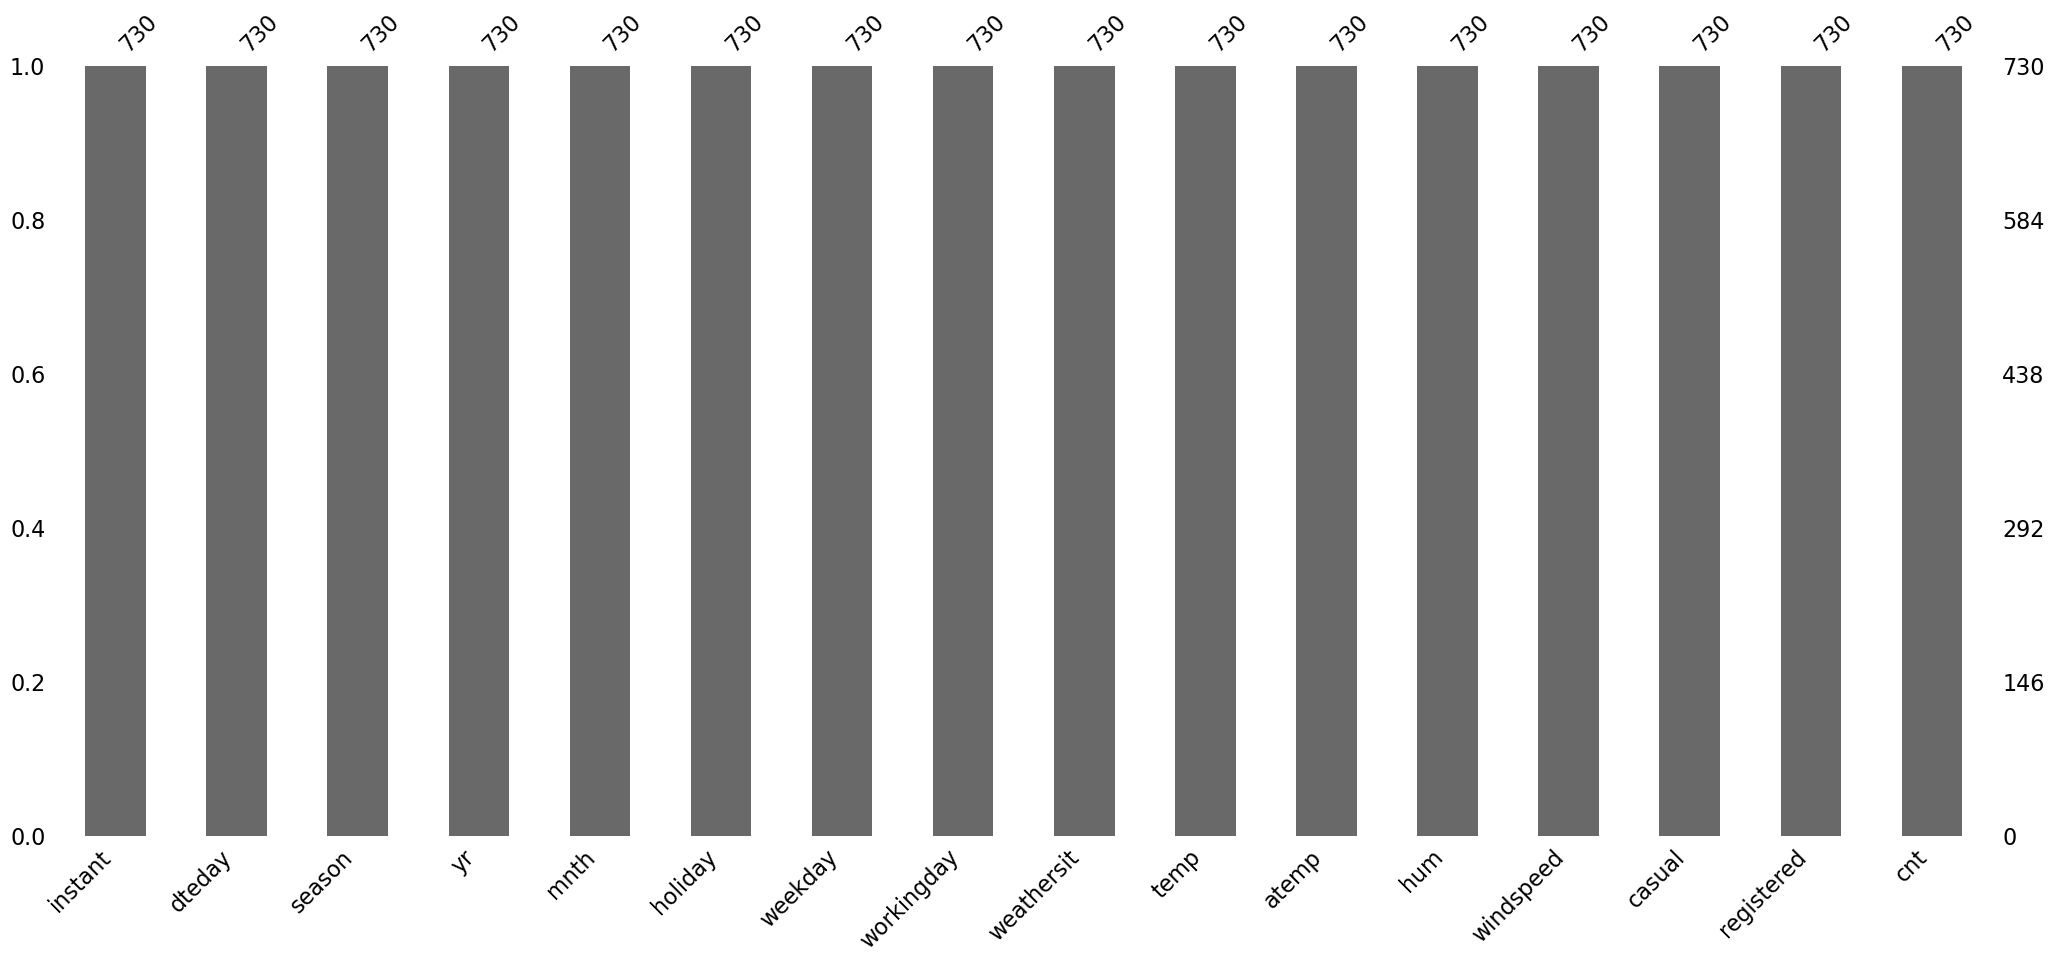

In [7]:
# Using missingno to determine any missing values and find out  
# any pattern if there are any missing values present in the dataset
mn.bar(bk)

There are no missing values in the dataset

### Duplicate Values

In [8]:
# Creating a copy of original dataframe for duplicate check
bk_d = bk

# Checking for duplicates and dropping the entire duplicate row if any
bk_d.drop_duplicates(subset=None, inplace=True)
bk_d.shape



(730, 16)

After executing the drop duplicate command, the shape matches the original dataframe. 
As a result, it can be said that the dataset was free of duplicate values. 

### Dropping Redundant columns

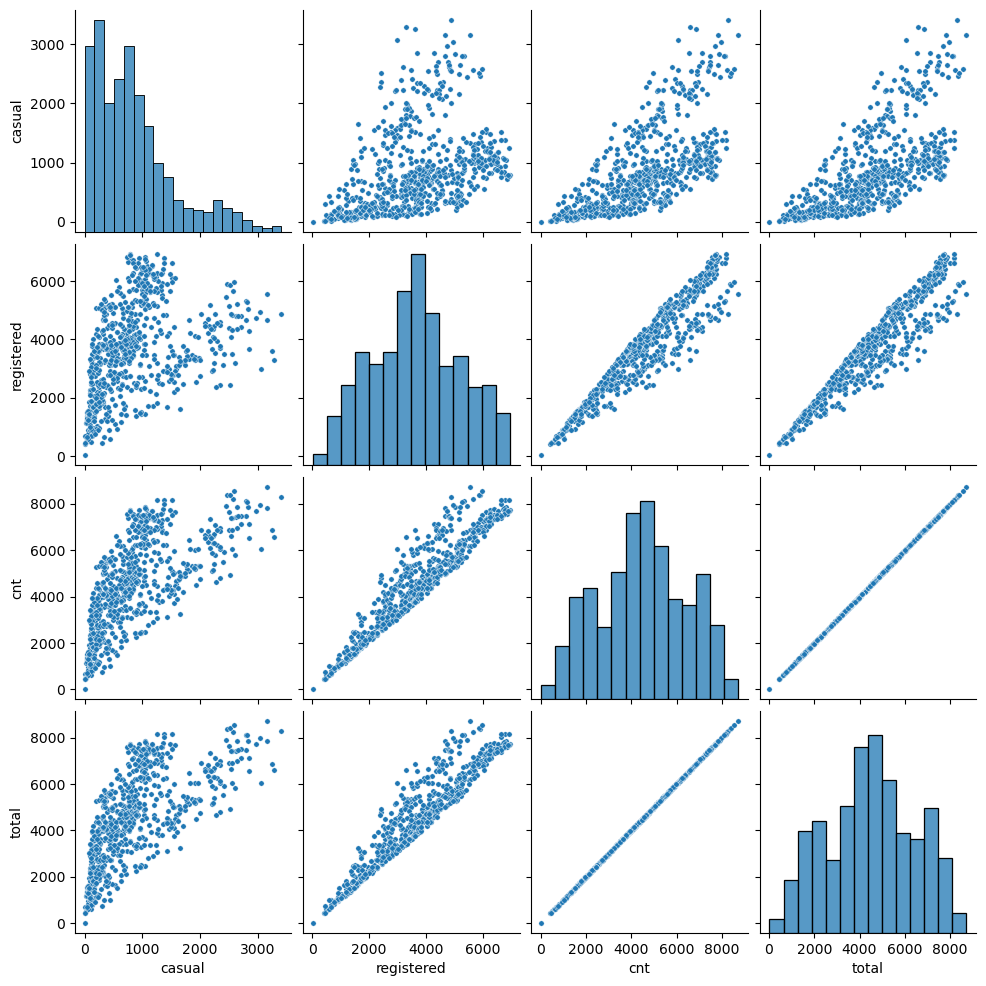

In [9]:
# Checking the relationship between casual, registered and cnt column
bk_rel = bk[['casual','registered','cnt']]
# creating a new column 'total' where total = casual + registered
bk_rel['total'] = bk_rel['casual'] + bk_rel['registered']
sns.pairplot(bk_rel, plot_kws={"s": 15})
plt.show()

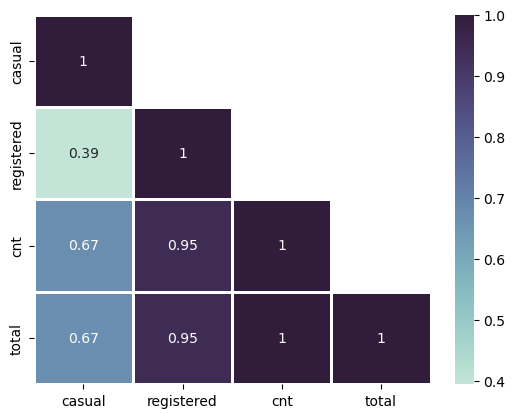

In [10]:
# Checking the correlation of the variables 

cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True) #Setting palette colour
mask = np.triu(bk_rel.corr())
np.fill_diagonal(mask, False)
sns.heatmap(bk_rel.corr(), annot = True, cmap = cmap, mask = mask, linewidth =1) #Heatmap wrt correlation
plt.show()

Both these columns depicts the count of bike booked by different categories of customers. From the pairplot as well as the correlation heatmap, it can be concurred that total bike rental value 'cnt = 'casual' + 'registered'. Given objective is to find the total count of bikes and not by specific category, so, these columns can be dropped.

Along with these columns 'instant' and 'dteday' can also be dropped as they depict index value and date respectively. As we have year and month column, there's no need for 'dteday' column.

In [11]:
bk.drop(['instant','dteday','casual','registered'],axis=1,inplace=True) #Dropping columns
bk.shape

(730, 12)

The number of columns have been reduced to 12. 

### Data Type Conversion and Mapping

In [12]:
# Converting columns to categorical
cat_col = ['season','mnth','yr','weekday','weathersit','holiday','workingday']
bk[cat_col]=bk[cat_col].astype('category')

In [13]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 40.6 KB


The said columns have been converted to categorical columns

In [14]:
#Mapping values to season, mnth, weekday and weathersit
bk['season']=bk.season.map({1:'Spring', 2:'Summer',3:'Fall', 4:'Winter' })
bk['mnth']=bk.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                         10:'October',11:'November',12:'December'})
bk['weekday']=bk.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bk['weathersit']=bk.weathersit.map({1: 'Clear',2:'Misty_Cloudy',3:'Light_Snow_Rain',4:'Heavy_Rain_Snow_Fog'})

In [15]:
bk

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,December,0,Thursday,1,Misty_Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,December,0,Friday,1,Misty_Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,December,0,Saturday,0,Misty_Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,December,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


---------------------------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis (EDA)

### Categorical Variable Analysis 

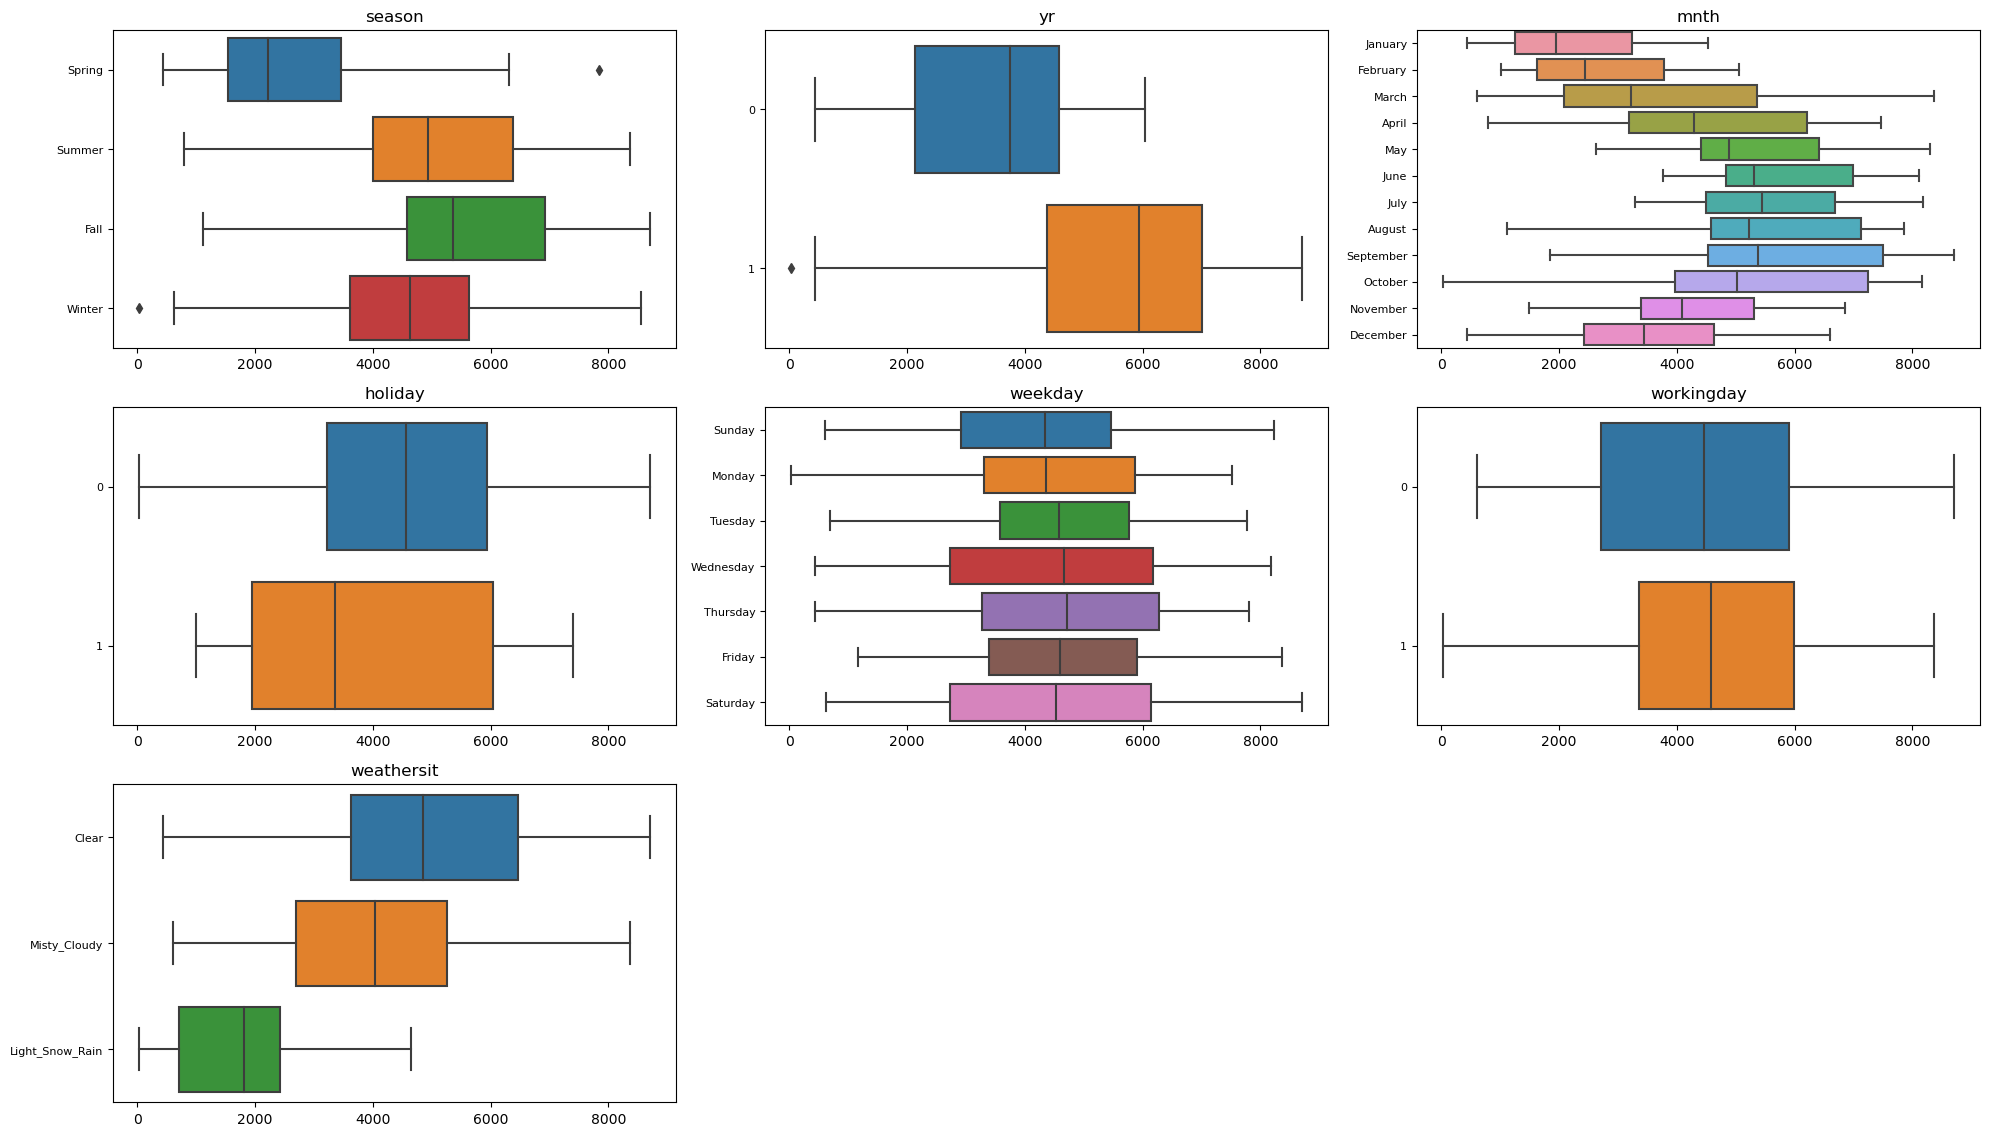

In [16]:
# Creating a boxplot of each variable w.r.t. 'cnt' to see 
# how each of the predictor variable stackup against the target variable

cat_box = [] # making a list
for i in bk.select_dtypes(include='category').columns:
    cat_box.extend([col for col in bk.columns if i in col])# storing all the categorical variables

bk_cat_box = bk[cat_box + ["cnt"]] # making a dataframe to compare categorical variables with 'cnt'

fig = plt.figure(figsize=(20,15))
for i,j in itertools.zip_longest(cat_box,range(len(cat_box))):
    plt.subplot(4, 3, j + 1)
    sns.boxplot(y = bk_cat_box[i], x = bk_cat_box['cnt'])
    plt.yticks(fontsize = 8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    
plt.tight_layout()
plt.show()

• Fall has the highest average rentals, followed by summer, according to the season vs. rentals per day plot.

• When comparing year over year rental growth, 2019 has had a median 2000 rise over 2018.

• According to the month-by-month plot, September has the highest rental rates, followed by the two months immediately after. It appears that seasonal rentals also account for the trend.

• Holidays have a lower rental count than working days, and holiday demand is more erratic.

• Other than Thursdays and Sundays having a bigger fluctuation in rentals than other days, there is no discernible difference between rentals on weekdays and weekends.

In [17]:
# Function to generate statistics related to Categorical Variables
def cat_stat(col):
    bk_cat = bk.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    bk_cat['sum_perc'] = bk_cat['sum']/bk.cnt.sum()*100
    bk_cat['count_perc'] = bk_cat['count']/bk.cnt.count()*100
    return round(bk_cat,2)

In [18]:
# Function to generate plots related to Categorical Variables
def cat_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(x = col, y = 'cnt',data = bk, palette = "crest", ci = None)
    plt.xticks(rotation=45)
    plt.subplot(1,2,2)
    pal = ["#b285bc", "#f4d8e8"]
    sns.barplot(x = col, y ='cnt',data = bk, hue = 'yr', palette = "rocket_r", ci = None)
    plt.xticks(rotation=45)
    plt.legend(labels=['2018', '2019'])
    return

##### season

In [19]:
cat_stat('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
Fall,1061129,5644.30,188,32.24,25.75
Summer,918589,4992.33,184,27.91,25.21
Winter,841613,4728.16,178,25.57,24.38
Spring,469514,2608.41,180,14.27,24.66


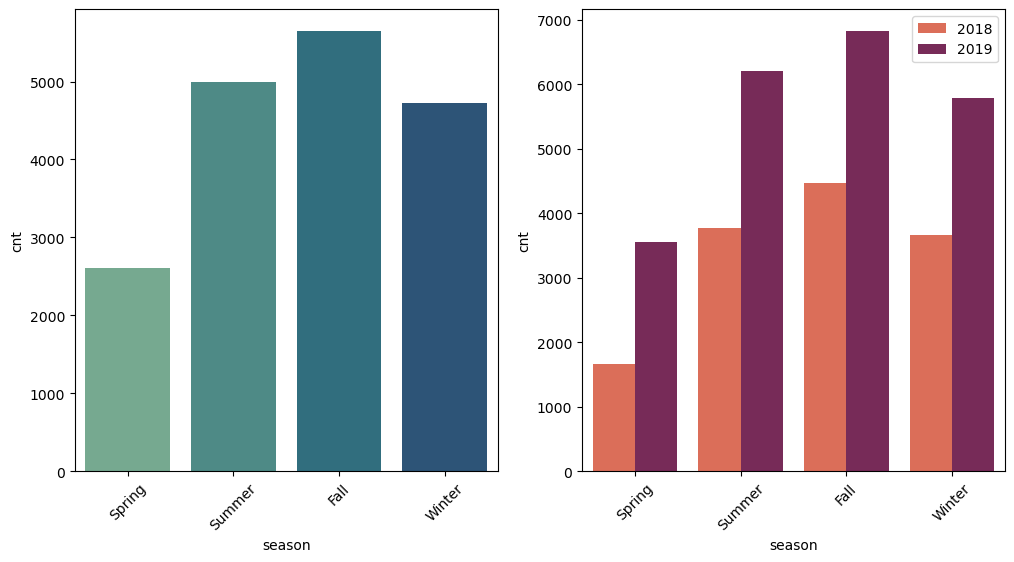

In [20]:
cat_plot('season',12,6)

With a median of over 5000 bookings over the course of two years, about 32% of bike reservations took place in the fall. With 27% and 25% of the overall booking, Summer and Winter are the next two seasons. It suggests that the dependent variable may be well predicted by the season.

##### mnth

In [21]:
cat_stat('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
August,351194,5664.42,62,10.67,8.49
June,346342,5772.37,60,10.52,8.22
September,345991,5766.52,60,10.51,8.22
July,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
October,322352,5199.23,62,9.80,8.49
April,269094,4484.90,60,8.18,8.22
November,254831,4247.18,60,7.74,8.22
March,228920,3692.26,62,6.96,8.49


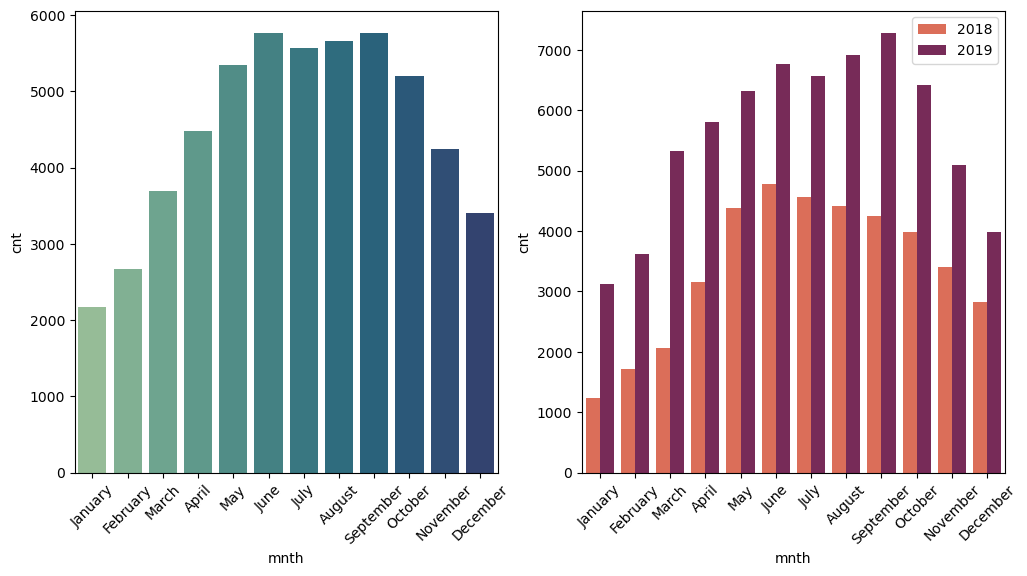

In [22]:
cat_plot('mnth',12,6)

With a median of more than 4000 bookings each month, the months of May through September saw about 10% of the bike reservations. It shows that the month has a bookings pattern and has the potential to be a reliable predictor of the dependent variable. 

##### weathersit

In [23]:
cat_stat('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty_Cloudy,995024,4044.81,246,30.24,33.70
Light_Snow_Rain,37869,1803.29,21,1.15,2.88


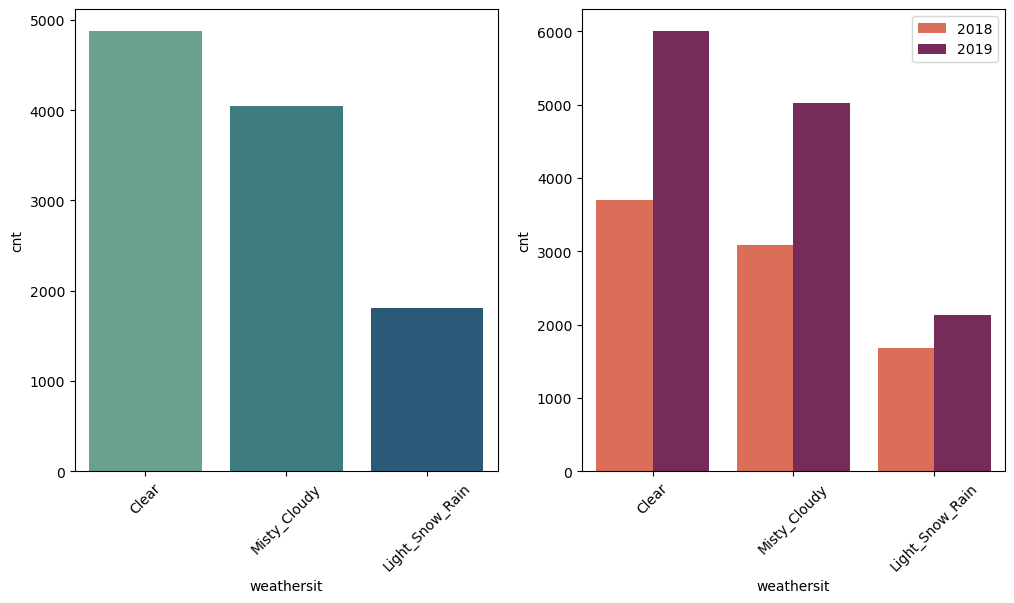

In [24]:
cat_plot('weathersit',12,6)

With a median of about 5000 bookings over two years, nearly 68.6% of bike reservations occurred during clear weather. With 30% of the total bookings, Misty came in second. It suggests that there is a tendency in the weathersit regarding the booking of bikes, and that this trend may be a solid predictor of the dependent variable.

##### weekday

In [25]:
cat_stat('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Friday,487790,4690.29,104,14.82,14.25
Thursday,485395,4667.26,104,14.75,14.25
Saturday,477807,4550.54,105,14.52,14.38
Wednesday,471214,4574.89,103,14.32,14.11
Tuesday,469109,4510.66,104,14.25,14.25
Monday,455503,4338.12,105,13.84,14.38
Sunday,444027,4228.83,105,13.49,14.38


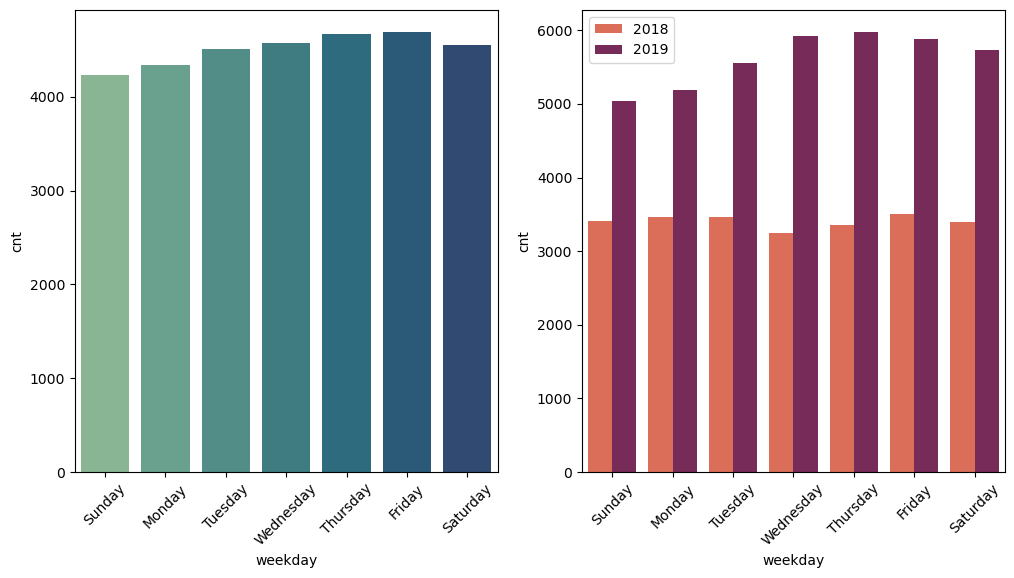

In [26]:
cat_plot('weekday',12,6)

Weekday variable exhibits a fairly close trend, with independent medians of between 4,000 and 5,000 bookings (between 13.5% and 14.8% of total booking on all days of the week). The predictor may be somewhat or completely unaffected by this variable. 

##### holiday

In [27]:
cat_stat('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


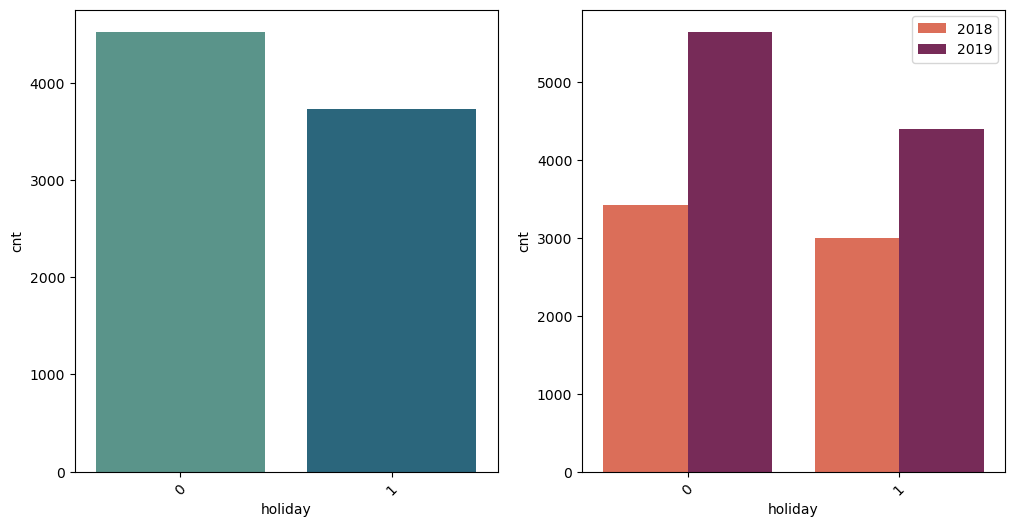

In [28]:
cat_plot('holiday',12,6)

Almost 97% of bike rentals are happening during non-holiday time. 

##### workingday

In [29]:
cat_stat('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


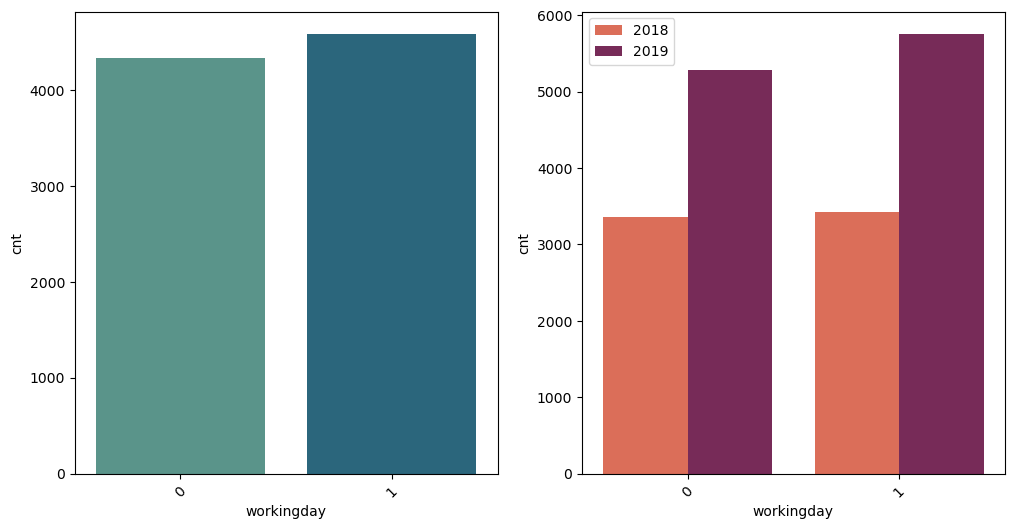

In [30]:
cat_plot('workingday',12,6)

Approximately 69% of the bike booking happened during 'workingday' with a median of close to 5000 bookings (for two years). It indicates that the workingday can be a good predictor of the dependent variable 

### Numerical Variable Analysis

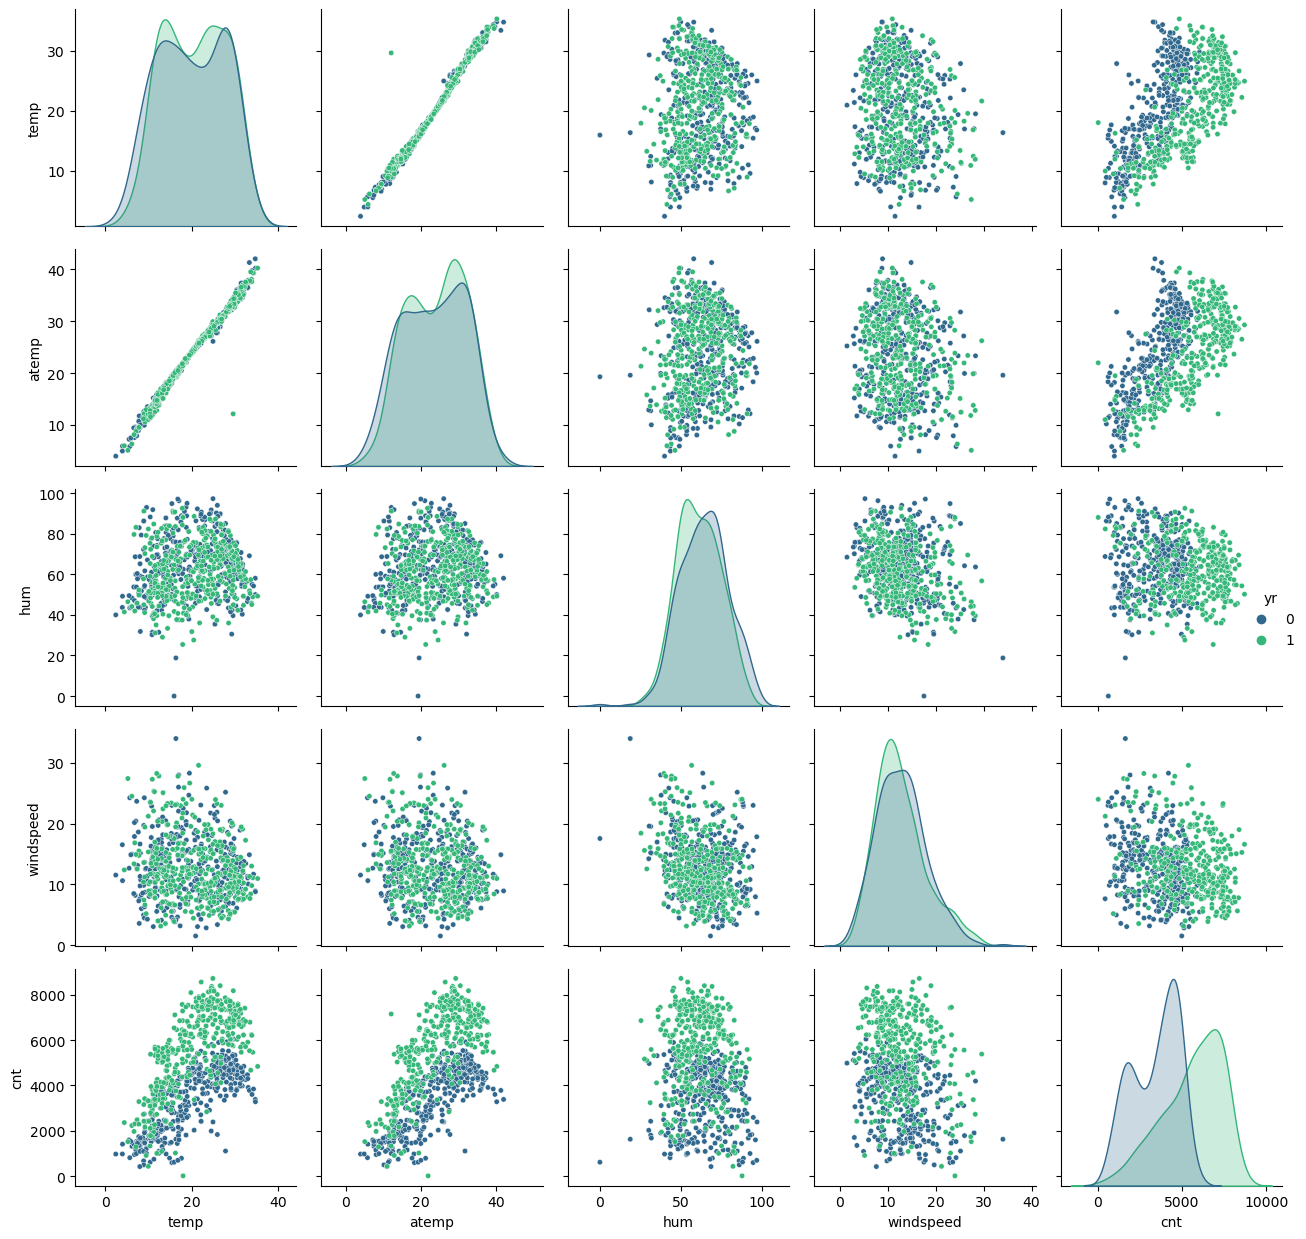

In [31]:
#Generating pairplot to check the relationships between numeric variables variables
bk_num = bk[['temp','atemp','hum','windspeed','cnt', 'yr']]
sns.pairplot(bk_num, plot_kws={"s": 15}, hue = 'yr', palette = 'viridis') 
plt.tight_layout()
plt.show()

• The number of rentals per day seem to be increasing with temperature and adjusted temperature

• Adjusted temperature and temperature have similar trends 

• All the parameters have increased values in 2019 compared to 2018. Thus, year may become a key paratemeter in the model

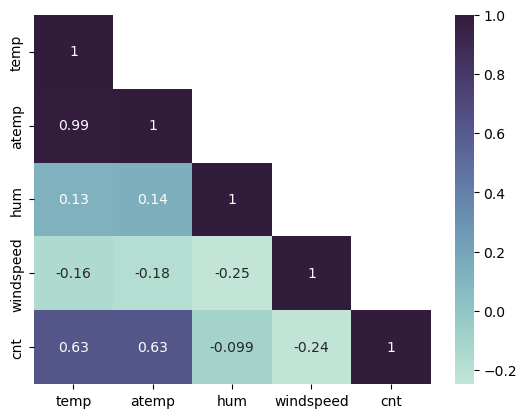

In [32]:
# Checking correlation of the parameters by mapping a correlation heatmap

mask = np.triu(bk_num.corr())
np.fill_diagonal(mask, False)
sns.heatmap(bk_num.corr(), annot = True, cmap = cmap, mask = mask)
plt.show()

• Adjusted temperature has the highest positive correlation with cnt followed by temperature.

• Humidity has the lowest correlation.

• There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity.

In [33]:
# correlation between 'temp' and 'atemp'
bk[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


• Since the temp and atemp have a correlation of almost 1, one of them may be dropped.

• The term "atemp" stands for "adjusted temperature," which is a composite measurement of temperature, humidity, and windspeed and an indicator of how hot it actually feels.

• Because atemp is a compound variable, there is a possibility that it would skew the data. Alternatively, we could utilize temp, hum, and windspeed to obtain adjusted temperature, hence, dropping atemp. Additionally, keeping the temperature and deriving the adjusted temperature from it makes financial sense.

In [34]:
bk.drop(['atemp'],axis=1,inplace=True)
bk.shape

(730, 11)

The number of columns have been reduced to 11.

In [35]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 34.9 KB


---------------------------------------------------------------------------------------------------------------------------

# Data Preparation

### Dummy Variable Creation

In [36]:
# Dummy variables for month, season, weathersit, weekday
season_d = pd.get_dummies(bk['season'],drop_first=True)
mnth_d = pd.get_dummies(bk['mnth'],drop_first=True)
weekday_d = pd.get_dummies(bk['weekday'],drop_first=True)
weathersit_d = pd.get_dummies(bk['weathersit'],drop_first=True)
print("\033[1mSeason dummies: \033[0m\n\n", season_d)
print("--------------------------------------------------------------------------------------------------------------------------\n")
print("\033[1mMonth dummies: \033[0m\n\n", mnth_d)
print("--------------------------------------------------------------------------------------------------------------------------\n")
print("\033[1mWeeday dummies: \033[0m\n\n", weekday_d)
print("--------------------------------------------------------------------------------------------------------------------------\n")
print("\033[1mWeather dummies: \033[0m\n\n", weathersit_d)

Season dummies: 

      Summer  Fall  Winter
0         0     0       0
1         0     0       0
2         0     0       0
3         0     0       0
4         0     0       0
..      ...   ...     ...
725       0     0       0
726       0     0       0
727       0     0       0
728       0     0       0
729       0     0       0

[730 rows x 3 columns]
--------------------------------------------------------------------------------------------------------------------------

Month dummies: 

      February  March  April  May  June  July  August  September  October  \
0           0      0      0    0     0     0       0          0        0   
1           0      0      0    0     0     0       0          0        0   
2           0      0      0    0     0     0       0          0        0   
3           0      0      0    0     0     0       0          0        0   
4           0      0      0    0     0     0       0          0        0   
..        ...    ...    ...  ...   ...   ...   

### Merging Dataframes

In [37]:
# Creating a new dataframe called bk_new where season, month, weather and weekday dataframe is being added
df = pd.concat([bk,season_d,mnth_d,weekday_d,weathersit_d], axis = 1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Misty_Cloudy,Light_Snow_Rain
0,Spring,0,January,0,Saturday,0,Misty_Cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,1,1,0
1,Spring,0,January,0,Sunday,0,Misty_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,0,0,0
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,December,0,Thursday,1,Misty_Cloudy,10.420847,65.2917,23.458911,...,0,1,0,0,0,1,0,0,1,0
726,Spring,1,December,0,Friday,1,Misty_Cloudy,10.386653,59.0000,10.416557,...,0,1,0,0,0,0,1,0,1,0
727,Spring,1,December,0,Saturday,0,Misty_Cloudy,10.386653,75.2917,8.333661,...,0,1,0,0,0,0,0,1,1,0
728,Spring,1,December,0,Sunday,0,Clear,10.489153,48.3333,23.500518,...,0,1,0,0,0,0,0,0,0,0


In [38]:
df.shape

(730, 33)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season           730 non-null    category
 1   yr               730 non-null    category
 2   mnth             730 non-null    category
 3   holiday          730 non-null    category
 4   weekday          730 non-null    category
 5   workingday       730 non-null    category
 6   weathersit       730 non-null    category
 7   temp             730 non-null    float64 
 8   hum              730 non-null    float64 
 9   windspeed        730 non-null    float64 
 10  cnt              730 non-null    int64   
 11  Summer           730 non-null    uint8   
 12  Fall             730 non-null    uint8   
 13  Winter           730 non-null    uint8   
 14  February         730 non-null    uint8   
 15  March            730 non-null    uint8   
 16  April            730 non-null    uint8   
 1

### Removing unncessary columns

In [40]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
df.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
df.shape

(730, 29)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   yr               730 non-null    category
 1   holiday          730 non-null    category
 2   workingday       730 non-null    category
 3   temp             730 non-null    float64 
 4   hum              730 non-null    float64 
 5   windspeed        730 non-null    float64 
 6   cnt              730 non-null    int64   
 7   Summer           730 non-null    uint8   
 8   Fall             730 non-null    uint8   
 9   Winter           730 non-null    uint8   
 10  February         730 non-null    uint8   
 11  March            730 non-null    uint8   
 12  April            730 non-null    uint8   
 13  May              730 non-null    uint8   
 14  June             730 non-null    uint8   
 15  July             730 non-null    uint8   
 16  August           730 non-null    uint8   
 1

Dummy dataset 'df' has 29 columns.

### Splitting data into Train and Test Datasets


In [42]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size=0.3, random_state = 100) #dividing training and test data in 70:30 ratio

Splitting the dataset into training and test in ratio of 70:30.

In [43]:
df_train.shape

(510, 29)

In [44]:
df_train.describe()

,temp,hum,windspeed,cnt,Summer,Fall,Winter,February,March,April,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Misty_Cloudy,Light_Snow_Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,20.102429,63.112926,12.831318,4486.382353,0.245098,0.262745,0.24902,0.066667,0.098039,0.078431,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,7.431169,14.156632,5.291832,1952.158739,0.430568,0.440557,0.43287,0.249689,0.297660,0.269113,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.615847,73.250025,15.750879,5973.500000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_test.shape

(219, 29)

In [46]:
df_test.describe()

,temp,hum,windspeed,cnt,Summer,Fall,Winter,February,March,April,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Misty_Cloudy,Light_Snow_Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,20.815737,61.961883,12.600130,4546.981735,0.264840,0.246575,0.232877,0.100457,0.054795,0.091324,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,7.689600,14.456669,4.984858,1898.633630,0.442259,0.432005,0.423633,0.301297,0.228100,0.288730,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,3.957390,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.093750,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.807500,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.401653,72.192050,15.395629,5869.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,34.815847,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 219 in test dataset

### Rescaling Features

In [47]:
scaler = MinMaxScaler()

In [48]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Misty_Cloudy,Light_Snow_Rain
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [49]:
df_num = ['temp','hum','windspeed','cnt']
df_train[df_num] = scaler.fit_transform(df_train[df_num])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Misty_Cloudy,Light_Snow_Rain
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0


### Checking Correlation

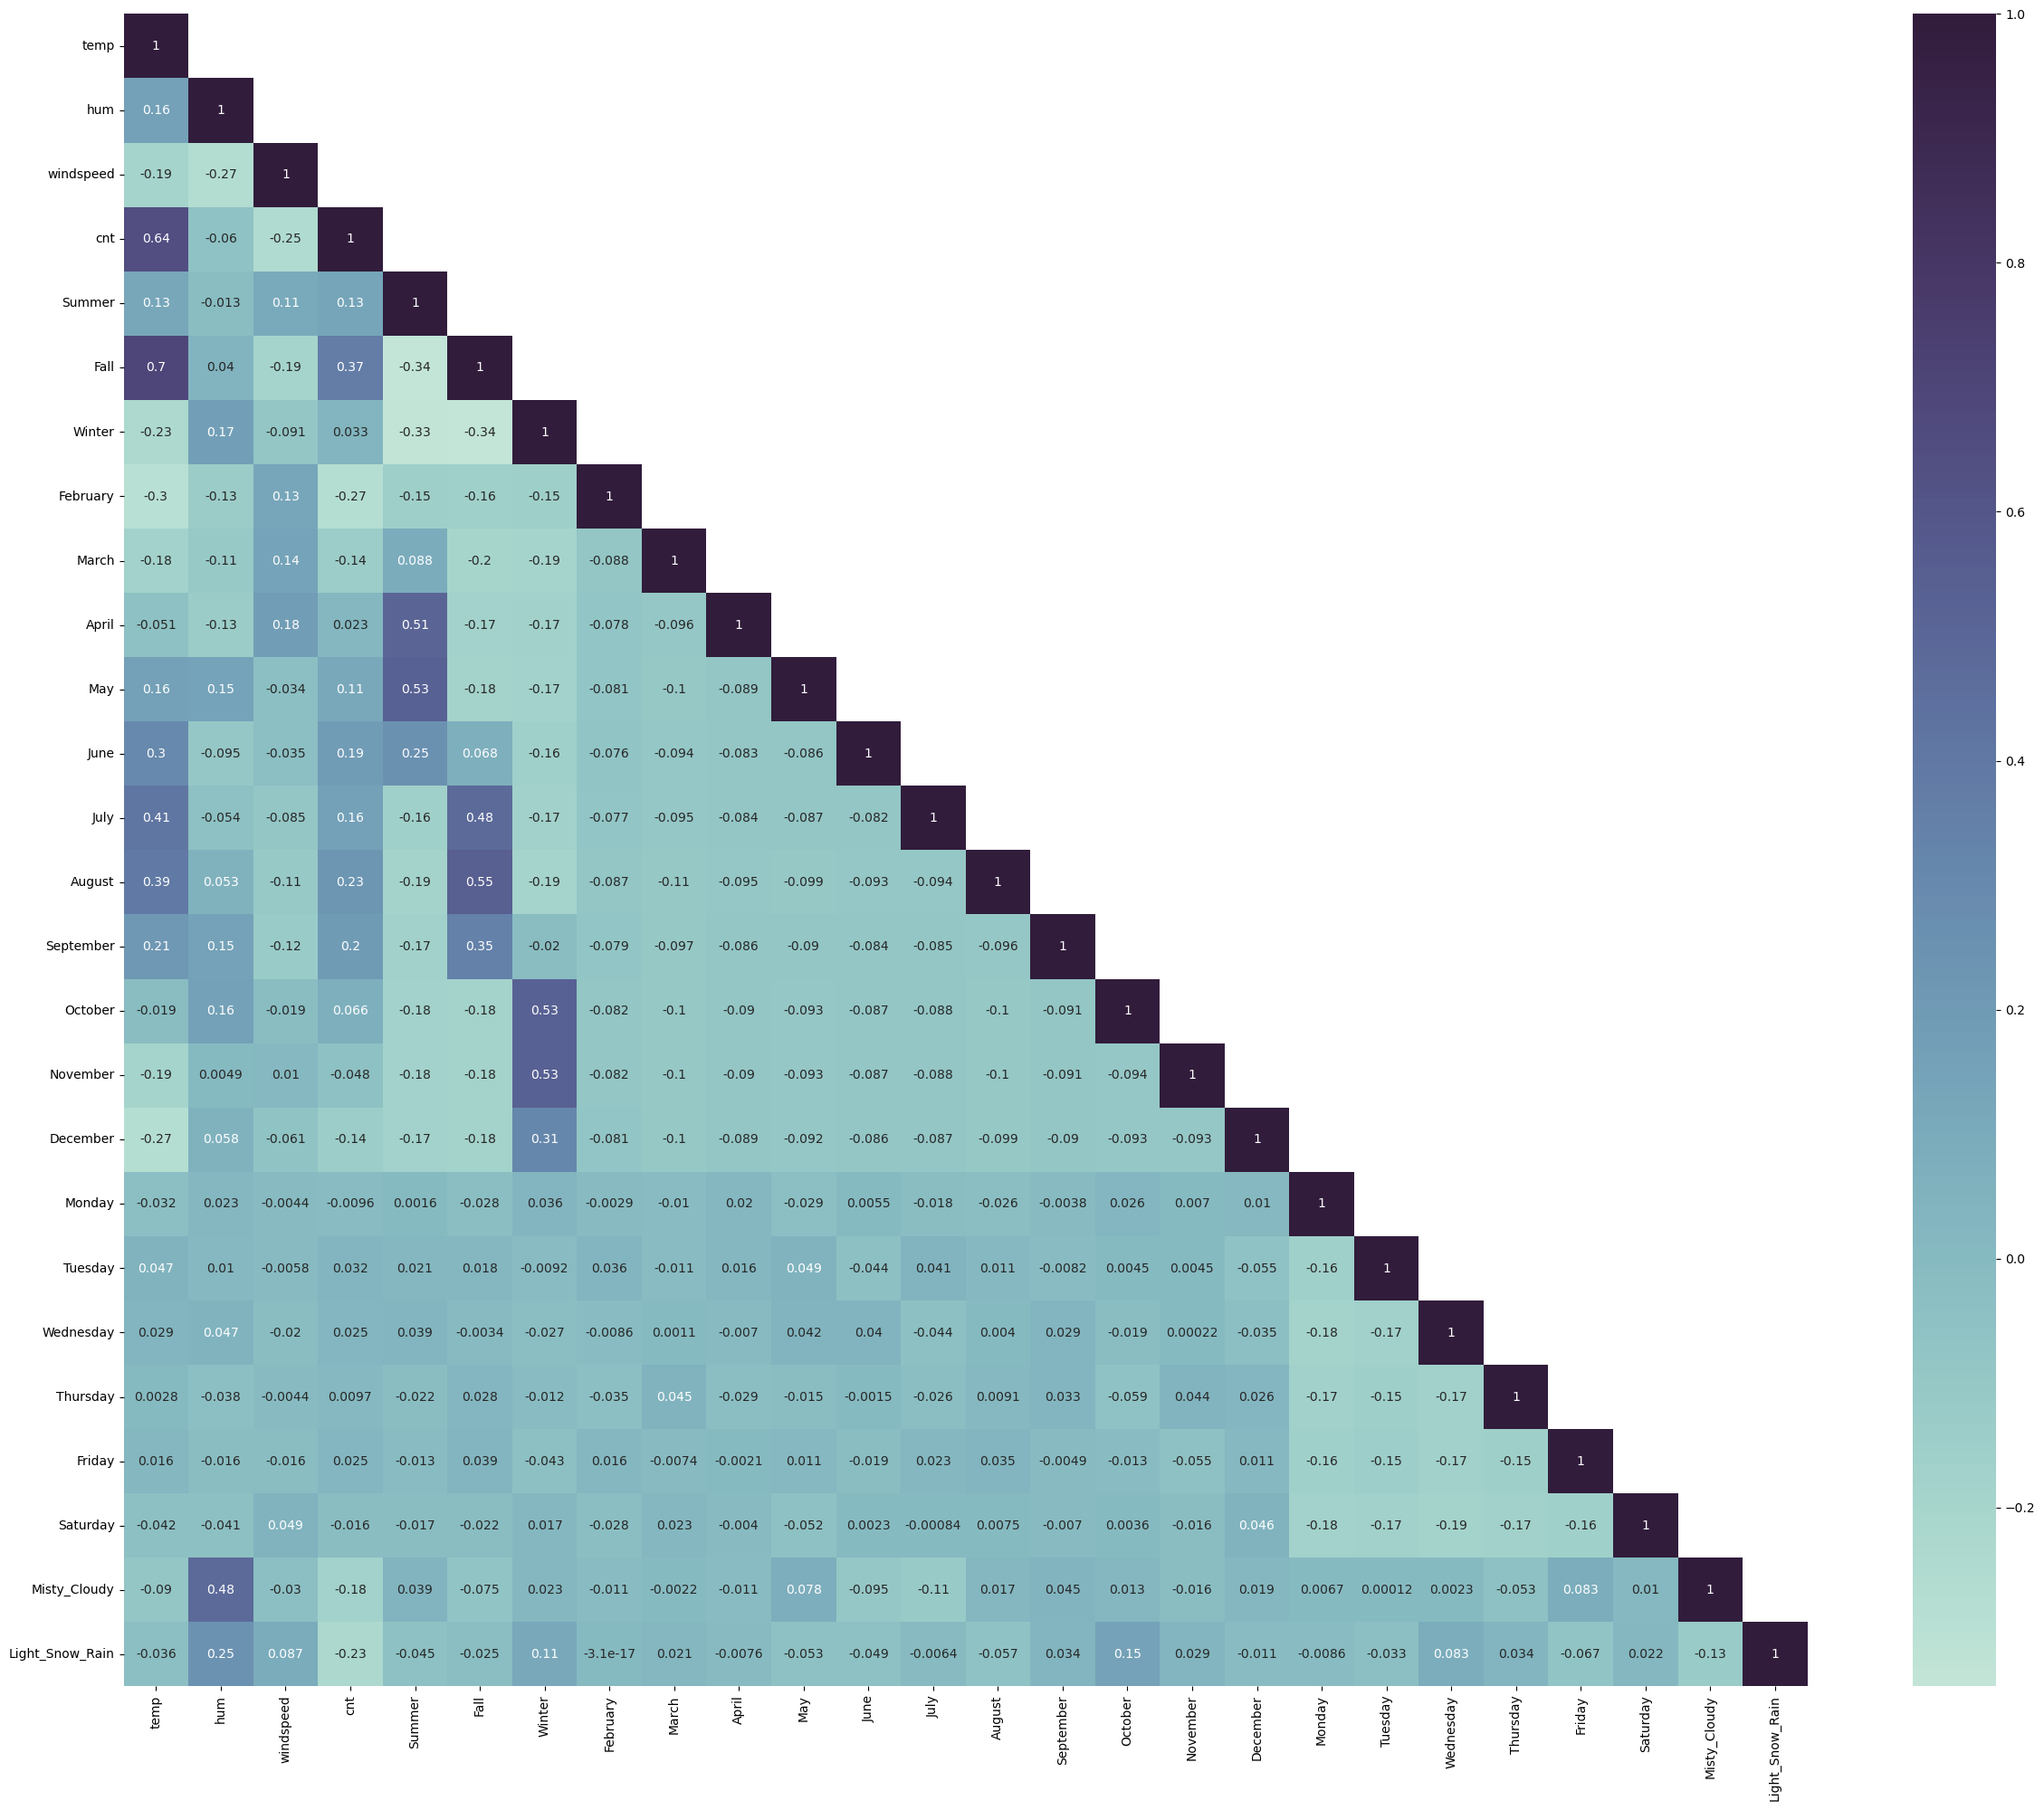

In [50]:
plt.figure(figsize = (30,24))
mask = np.triu(df_train.corr())
np.fill_diagonal(mask, False)
sns.heatmap(df_train.corr(), annot = True, cmap = cmap, mask = mask)
plt.show()

• 'cnt' and 'Fall' have strong correlation with 'temp'.

• 'December', 'February', 'March', 'Misty_CLoudy' and 'Light_Snow_Rain' have negative correlation with 'cnt'.

• Various months and corresponding weather have correlation.

• 'Misty_CLoudy' has strong correlation with 'hum'.


### Dividing into X and Y sets for the model building

In [51]:
#Divide the data into X and y
Y_train = df_train.pop('cnt')
X_train = df_train

---------------------------------------------------------------------------------------------------------------------------

# Building Linear Model

### Recursive Feature Elimination (RFE)

In [52]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=15) # running RFE
rfe = rfe.fit(X_train, Y_train)

In [53]:
# Checking which parameters have been selected in that list of 15
ranking = pd.DataFrame({'features' : X_train.columns, 'rank' : rfe.ranking_, 'support': rfe.support_})
ranking

,features,rank,support
0,yr,1,True
1,holiday,1,True
2,workingday,1,True
3,temp,1,True
4,hum,1,True
5,windspeed,1,True
6,Summer,1,True
7,Fall,14,False
8,Winter,1,True
9,February,8,False


In [54]:
#Columns where RFE support is True
rfe_col = X_train.columns[rfe.support_]
print(rfe_col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Summer',
       'Winter', 'March', 'August', 'September', 'October', 'Saturday',
       'Misty_Cloudy', 'Light_Snow_Rain'],
      dtype='object')


                                 OR

In [55]:
ranking.loc[ranking['rank'] == 1,'features'].values

array(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Summer', 'Winter', 'March', 'August', 'September', 'October',
       'Saturday', 'Misty_Cloudy', 'Light_Snow_Rain'], dtype=object)

In [56]:
#Columns where RFE support is False
rfe_n_col = X_train.columns[~rfe.support_]
print(rfe_n_col)

Index(['Fall', 'February', 'April', 'May', 'June', 'July', 'November',
       'December', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object')


In [57]:
# Creating X_train dataframe with RFE selected variables
X_train_1 = X_train[rfe_col]

### Building functions

In [58]:
def ols_1(Y,X): # to obtain the final model and its summary
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(Y,X_train_sm.astype(float)).fit()
    summary =  model.summary()
    return model, summary
def ols(Y,X): # to run ols regression on every new model
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(Y,X_train_sm.astype(float)).fit()
    return model.summary()
def vif(df): # to calculate vif of the model
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values.astype(float), i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model 1

In [59]:
ols(Y_train,X_train_1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.0
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          1.47e-191
Time:                        02:53:57   Log-Likelihood:                 520.35
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -940.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1894      0.029      6.554      0.000       0.133       0.246
yr                  0.2290      0.008     28.757      0.000       0.213       0.245
holiday            -0.0543      0.027     -2.022      0.044      -0.107      -0.002
workingday          0.0436      0.012      3.785      0.000       0.021       0.066
temp                0.5351      0.022     24.124      0.000       0.492       0.579
hum                -0.1682      0.037     -4.558      0.000      -0.241      -0.096
windspeed          -0.1880      0.025     -7.446      0.000      -0.238      -0.138
Summer              0.1040      0.011      9.699      0.000       0.083       0.125
Winter              0.1384      0.012     11.408      0.000       0.115       0.162
March               0.0213      0.014      1.521      0.129      -0.006       0.049
August              0.0578      0.016      3.586      0.000       0.026       0.089
September           0.1269      0.016      7.870      0.000       0.095       0.159
October             0.0408      0.017      2.387      0.017       0.007       0.074
Saturday            0.0521      0.015      3.592      0.000       0.024       0.081
Misty_Cloudy       -0.0583      0.010     -5.632      0.000      -0.079      -0.038
Light_Snow_Rain    -0.2499      0.026     -9.618      0.000      -0.301      -0.199
==============================================================================
Omnibus:                       72.210   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.411
Skew:                          -0.735   Prob(JB):                     1.34e-38
Kurtosis:                       5.459   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif(X_train_1)

,Features,VIF
4,hum,16.79
3,temp,10.17
2,workingday,5.09
5,windspeed,3.91
7,Winter,2.35
13,Misty_Cloudy,2.14
0,yr,2.03
12,Saturday,1.92
6,Summer,1.83
11,October,1.62


### Model 2

Removing 'hum' from the model as it has high VIF

In [61]:
X_train_2 = X_train_1.drop(['hum'], axis = 1)

In [62]:
X_train_2

,yr,holiday,workingday,temp,windspeed,Summer,Winter,March,August,September,October,Saturday,Misty_Cloudy,Light_Snow_Rain
653,1,0,1,0.509887,0.300794,0,1,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,1,0,0,0,1,1,0
728,1,0,0,0.245101,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.355596,1,0,0,0,0,0,0,1,0
578,1,0,1,0.863973,0.187140,0,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.111379,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.431816,0,1,0,0,0,0,1,1,0


In [63]:
ols(Y_train, X_train_2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.1
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          2.62e-188
Time:                        02:53:57   Log-Likelihood:                 509.84
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     495   BIC:                            -926.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0897      0.019      4.656      0.000       0.052       0.128
yr                  0.2327      0.008     28.814      0.000       0.217       0.249
holiday            -0.0527      0.027     -1.924      0.055      -0.106       0.001
workingday          0.0466      0.012      3.977      0.000       0.024       0.070
temp                0.5153      0.022     23.230      0.000       0.472       0.559
windspeed          -0.1558      0.025     -6.304      0.000      -0.204      -0.107
Summer              0.1009      0.011      9.247      0.000       0.079       0.122
Winter              0.1306      0.012     10.660      0.000       0.107       0.155
March               0.0224      0.014      1.573      0.116      -0.006       0.050
August              0.0562      0.016      3.418      0.001       0.024       0.088
September           0.1204      0.016      7.352      0.000       0.088       0.153
October             0.0368      0.017      2.117      0.035       0.003       0.071
Saturday            0.0571      0.015      3.872      0.000       0.028       0.086
Misty_Cloudy       -0.0853      0.009     -9.842      0.000      -0.102      -0.068
Light_Snow_Rain    -0.2954      0.024    -12.068      0.000      -0.343      -0.247
==============================================================================
Omnibus:                       70.512   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.854
Skew:                          -0.718   Prob(JB):                     7.93e-38
Kurtosis:                       5.445   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif(X_train_2)

,Features,VIF
3,temp,6.42
2,workingday,4.48
4,windspeed,3.71
6,Winter,2.07
0,yr,2.02
5,Summer,1.82
11,Saturday,1.79
10,October,1.62
8,August,1.61
12,Misty_Cloudy,1.54


### Model 3

Removing 'March' from the model as it has high p-value

In [65]:
X_train_3 = X_train_2.drop(['March'], axis = 1)

In [66]:
X_train_3

,yr,holiday,workingday,temp,windspeed,Summer,Winter,August,September,October,Saturday,Misty_Cloudy,Light_Snow_Rain
653,1,0,1,0.509887,0.300794,0,1,0,0,1,0,0,0
576,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.255342,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.663106,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.355596,1,0,0,0,0,0,1,0
578,1,0,1,0.863973,0.187140,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.111379,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.431816,0,1,0,0,0,1,1,0


In [67]:
ols(Y_train, X_train_3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          6.16e-189
Time:                        02:53:57   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0945      0.019      4.961      0.000       0.057       0.132
yr                  0.2329      0.008     28.799      0.000       0.217       0.249
holiday            -0.0543      0.027     -1.982      0.048      -0.108      -0.000
workingday          0.0475      0.012      4.045      0.000       0.024       0.070
temp                0.5099      0.022     23.236      0.000       0.467       0.553
windspeed          -0.1532      0.025     -6.203      0.000      -0.202      -0.105
Summer              0.1008      0.011      9.226      0.000       0.079       0.122
Winter              0.1267      0.012     10.544      0.000       0.103       0.150
August              0.0542      0.016      3.305      0.001       0.022       0.086
September           0.1189      0.016      7.259      0.000       0.087       0.151
October             0.0371      0.017      2.132      0.033       0.003       0.071
Saturday            0.0580      0.015      3.931      0.000       0.029       0.087
Misty_Cloudy       -0.0854      0.009     -9.839      0.000      -0.102      -0.068
Light_Snow_Rain    -0.2942      0.025    -12.009      0.000      -0.342      -0.246
==============================================================================
Omnibus:                       70.507   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.937
Skew:                          -0.704   Prob(JB):                     2.30e-39
Kurtosis:                       5.528   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif(X_train_3)

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,Winter,2.02
5,Summer,1.82
10,Saturday,1.77
9,October,1.62
7,August,1.59
11,Misty_Cloudy,1.54


### Model 4

Removing 'holiday' as it's p-value is close to 0.05

In [69]:
X_train_4 =  X_train_3.drop(['holiday'], axis = 1)

In [70]:
X_train_4

,yr,workingday,temp,windspeed,Summer,Winter,August,September,October,Saturday,Misty_Cloudy,Light_Snow_Rain
653,1,1,0.509887,0.300794,0,1,0,0,1,0,0,0
576,1,1,0.815169,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,1,0.824514,0.355596,1,0,0,0,0,0,1,0
578,1,1,0.863973,0.187140,0,0,1,0,0,0,0,0
53,0,1,0.202618,0.111379,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,0,0,1,1,0


In [71]:
ols(Y_train, X_train_4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.2
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          2.86e-189
Time:                        02:53:57   Log-Likelihood:                 506.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0856      0.019      4.610      0.000       0.049       0.122
yr                  0.2331      0.008     28.734      0.000       0.217       0.249
workingday          0.0555      0.011      5.031      0.000       0.034       0.077
temp                0.5116      0.022     23.259      0.000       0.468       0.555
windspeed          -0.1542      0.025     -6.226      0.000      -0.203      -0.106
Summer              0.1015      0.011      9.269      0.000       0.080       0.123
Winter              0.1260      0.012     10.461      0.000       0.102       0.150
August              0.0546      0.016      3.318      0.001       0.022       0.087
September           0.1172      0.016      7.146      0.000       0.085       0.149
October             0.0384      0.017      2.198      0.028       0.004       0.073
Saturday            0.0662      0.014      4.656      0.000       0.038       0.094
Misty_Cloudy       -0.0849      0.009     -9.764      0.000      -0.102      -0.068
Light_Snow_Rain    -0.2932      0.025    -11.936      0.000      -0.342      -0.245
==============================================================================
Omnibus:                       74.837   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.872
Skew:                          -0.735   Prob(JB):                     4.83e-43
Kurtosis:                       5.647   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif(X_train_4)

,Features,VIF
2,temp,6.26
1,workingday,4.07
3,windspeed,3.49
0,yr,2.02
5,Winter,1.99
4,Summer,1.82
9,Saturday,1.70
8,October,1.61
6,August,1.59
10,Misty_Cloudy,1.54


### Model 5

Removing 'October' due to high p-value.

In [73]:
X_train_5 = X_train_4.drop(['October'], axis = 1)

In [74]:
X_train_5

,yr,workingday,temp,windspeed,Summer,Winter,August,September,Saturday,Misty_Cloudy,Light_Snow_Rain
653,1,1,0.509887,0.300794,0,1,0,0,0,0,0
576,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1,1,0.824514,0.355596,1,0,0,0,0,1,0
578,1,1,0.863973,0.187140,0,0,1,0,0,0,0
53,0,1,0.202618,0.111379,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,0,1,1,0


In [75]:
ols(Y_train, X_train_5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          2.00e-189
Time:                        02:53:57   Log-Likelihood:                 504.10
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0813      0.019      4.384      0.000       0.045       0.118
yr                  0.2328      0.008     28.590      0.000       0.217       0.249
workingday          0.0548      0.011      4.951      0.000       0.033       0.077
temp                0.5209      0.022     24.043      0.000       0.478       0.563
windspeed          -0.1518      0.025     -6.111      0.000      -0.201      -0.103
Summer              0.0998      0.011      9.102      0.000       0.078       0.121
Winter              0.1391      0.011     13.242      0.000       0.118       0.160
August              0.0512      0.016      3.115      0.002       0.019       0.084
September           0.1116      0.016      6.862      0.000       0.080       0.144
Saturday            0.0655      0.014      4.593      0.000       0.037       0.094
Misty_Cloudy       -0.0839      0.009     -9.626      0.000      -0.101      -0.067
Light_Snow_Rain    -0.2869      0.024    -11.714      0.000      -0.335      -0.239
==============================================================================
Omnibus:                       66.187   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.561
Skew:                          -0.676   Prob(JB):                     1.36e-35
Kurtosis:                       5.394   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif(X_train_5)

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,Summer,1.81
8,Saturday,1.69
6,August,1.58
9,Misty_Cloudy,1.54
5,Winter,1.51
7,September,1.30


### Model 6

Removing 'August' due to slightly high

In [77]:
X_train_6 = X_train_5.drop(['August'], axis = 1)

In [78]:
X_train_6

,yr,workingday,temp,windspeed,Summer,Winter,September,Saturday,Misty_Cloudy,Light_Snow_Rain
653,1,1,0.509887,0.300794,0,1,0,0,0,0
576,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
526,1,1,0.824514,0.355596,1,0,0,0,1,0
578,1,1,0.863973,0.187140,0,0,0,0,0,0
53,0,1,0.202618,0.111379,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,1,1,0


In [79]:
ols(Y_train, X_train_6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          1.47e-188
Time:                        02:53:57   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0753      0.019      4.051      0.000       0.039       0.112
yr                  0.2331      0.008     28.382      0.000       0.217       0.249
workingday          0.0563      0.011      5.048      0.000       0.034       0.078
temp                0.5499      0.020     27.885      0.000       0.511       0.589
windspeed          -0.1552      0.025     -6.201      0.000      -0.204      -0.106
Summer              0.0874      0.010      8.481      0.000       0.067       0.108
Winter              0.1318      0.010     12.760      0.000       0.112       0.152
September           0.0972      0.016      6.181      0.000       0.066       0.128
Saturday            0.0677      0.014      4.710      0.000       0.039       0.096
Misty_Cloudy       -0.0813      0.009     -9.292      0.000      -0.099      -0.064
Light_Snow_Rain    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif(X_train_6)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Saturday,1.69
4,Summer,1.57
8,Misty_Cloudy,1.53
5,Winter,1.40
6,September,1.20
9,Light_Snow_Rain,1.08


Since this model has very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant, this can be considered for the final model.


In [81]:
req_model, summary = ols_1(Y_train, X_train_6)
req_model.params

const              0.075325
yr                 0.233056
workingday         0.056323
temp               0.549936
windspeed         -0.155238
Summer             0.087429
Winter             0.131826
September          0.097236
Saturday           0.067688
Misty_Cloudy      -0.081347
Light_Snow_Rain   -0.288021
dtype: float64

In [82]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          1.47e-188
Time:                        02:53:58   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0753      0.019      4.051      0.000       0.039       0.112
yr                  0.2331      0.008     28.382      0.000       0.217       0.249
workingday          0.0563      0.011      5.048      0.000       0.034       0.078
temp                0.5499      0.020     27.885      0.000       0.511       0.589
windspeed          -0.1552      0.025     -6.201      0.000      -0.204      -0.106
Summer              0.0874      0.010      8.481      0.000       0.067       0.108
Winter              0.1318      0.010     12.760      0.000       0.112       0.152
September           0.0972      0.016      6.181      0.000       0.066       0.128
Saturday            0.0677      0.014      4.710      0.000       0.039       0.096
Misty_Cloudy       -0.0813      0.009     -9.292      0.000      -0.099      -0.064
Light_Snow_Rain    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---------------------------------------------------------------------------------------------------------------------------

# Model Interpretation

The F-statistic is a statistical measure used to determine whether the overall linear regression model is significant or not. In the context of linear regression, the F-statistic is used to test the hypothesis that all the regression coefficients (except the intercept) are equal to zero.

F = (explained variance / p) / (residual variance / (n - p - 1))

where:

    "explained variance" is the variance in the predicted values (the variance explained by the model).
    "p" is the number of independent variables (features).
    "residual variance" is the variance in the residuals (the variance not explained by the model).
    "n" is the number of data points.
    
If the F-statistic is greater than the critical value (corresponding to a chosen significance level, typically 0.05), then the null hypothesis is rejected, indicating that the linear regression model is statistically significant, and at least one of the independent variables is contributing to the prediction of the target variable.

In the context of linear regression, the p-value associated with the F-statistic, often labeled as "Prob (F-statistic)" or "Prob(F)", represents the probability of obtaining an F-statistic as extreme as the one calculated from the data, assuming that the null hypothesis is true.

A low p-value (typically less than the chosen significance level, often 0.05) suggests that there is strong evidence against the null hypothesis. In other words, a low p-value indicates that the model's independent variables collectively have a significant effect on the dependent variable, and we can reject the null hypothesis in favor of the alternative hypothesis.

On the other hand, a high p-value suggests that there is no strong evidence against the null hypothesis, and the model's independent variables may not have a significant effect on the dependent variable.

In [83]:
f_stat = req_model.fvalue
p_val = req_model.f_pvalue

print("F-statistic:", f_stat)
print("F-statistic p-value:", p_val)

F-statistic: 253.95509906016662
F-statistic p-value: 1.4651644203345843e-188


The F-Statistics value of 253 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

---------------------------------------------------------------------------------------------------------------------------

# Model Validation

### Linear Relationship

The assumption of a linear relationship between the independent variables (features) and the dependent variable (target) is a fundamental requirement for linear regression. It means that the relationship between the features and the target should be approximately linear, implying that a change in the features leads to a proportional change in the target. This assumption can be verified by visually inspecting scatter plots of each independent variable against the target variable and checking for a linear pattern.

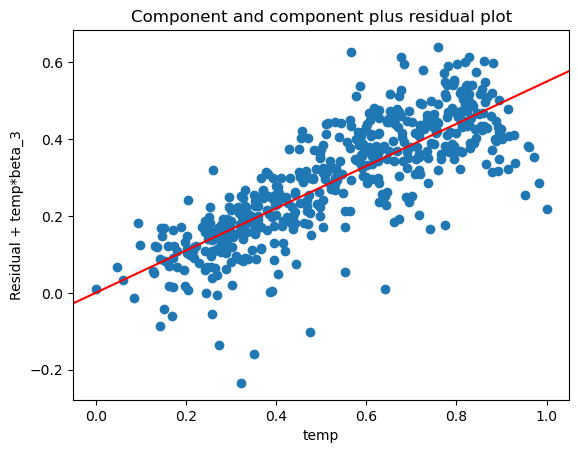

In [84]:
fig, ax = plt.subplots()
sm.graphics.plot_ccpr(req_model, 'temp', ax=ax)
fitted_line = ax.get_lines()[1] 
fitted_line.set_color('red')
plt.show()

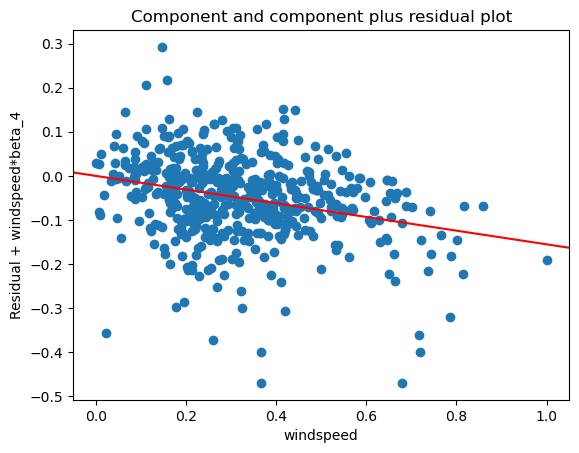

In [85]:
fig, ax = plt.subplots()
sm.graphics.plot_ccpr(req_model, 'windspeed', ax=ax)
fitted_line = ax.get_lines()[1]
fitted_line.set_color('red')
plt.show()

The above plots represents the relationship between the model and the predictor variables. As we can see, linearity is well preserved.

### Homoscedasticity

Homoscedasticity refers to the assumption that the variability (spread or dispersion) of the residuals (the differences between the actual target values and the predicted values) is constant across all levels of the independent variables. In other words, the spread of the residuals should be consistent and not dependent on the magnitude of the predicted values. To check for homoscedasticity, you can plot the residuals against the predicted values and look for a consistent spread.

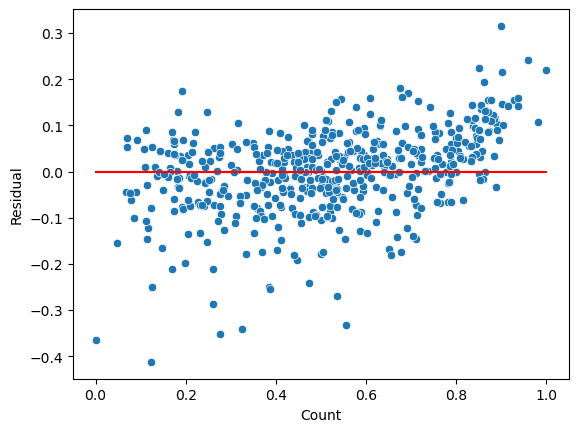

In [86]:
Y_train_p = req_model.predict(sm.add_constant(X_train_6))
residual = Y_train - Y_train_p
sns.scatterplot(x = Y_train, y = residual)
plt.plot(Y_train,(Y_train - Y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

There is no visible pattern in residual values, thus homoscedacity is well preserved.

### Absence of Multicollinearity

Multicollinearity occurs when two or more independent variables in the model are highly correlated with each other. It can lead to unstable and unreliable coefficient estimates, making it challenging to interpret the importance of individual features. To detect multicollinearity, you can calculate the variance inflation factor (VIF) for each independent variable. A high VIF value indicates strong multicollinearity, and in such cases, one may consider removing or combining highly correlated features.

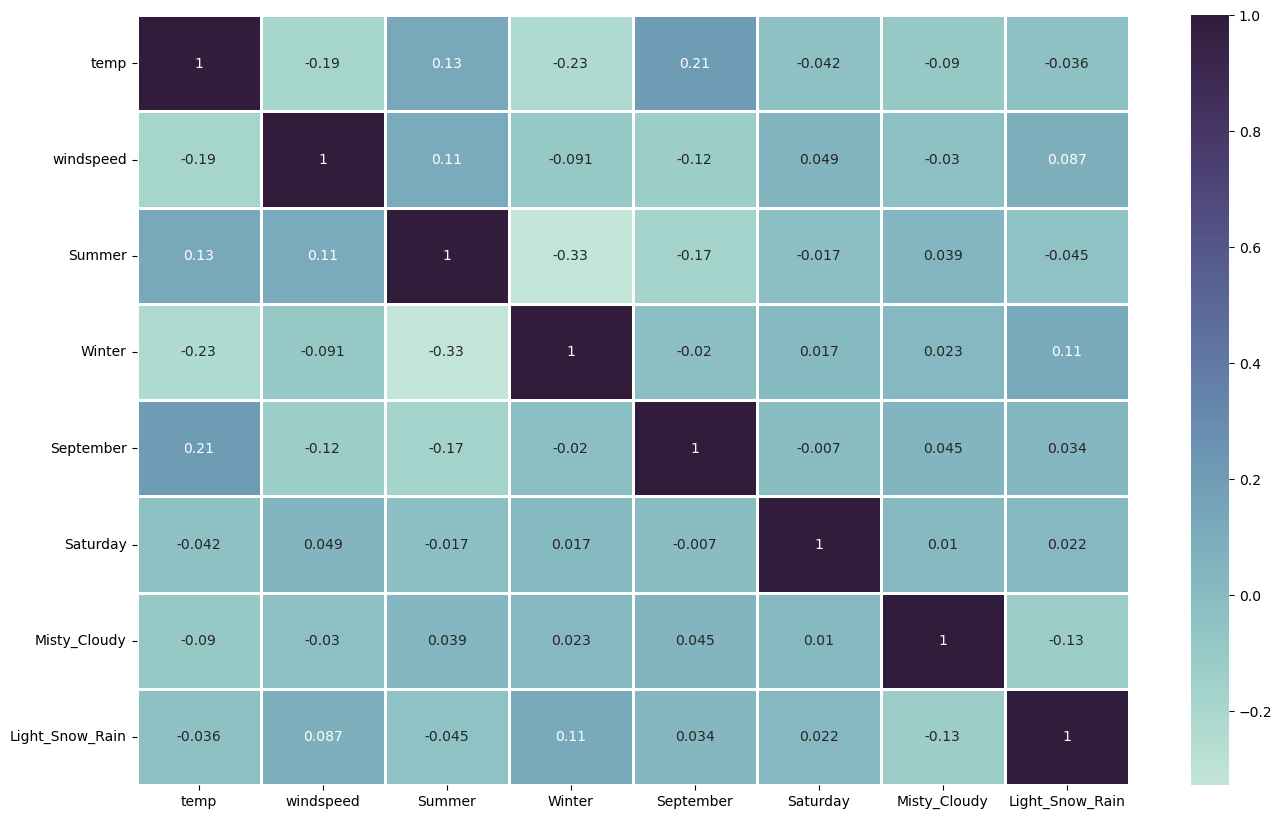

In [87]:
plt.figure(figsize=(16,10))
sns.heatmap(X_train_6.corr(),annot = True, cmap= cmap,linewidth =1)
plt.show()

In [88]:
vif(X_train_6)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Saturday,1.69
4,Summer,1.57
8,Misty_Cloudy,1.53
5,Winter,1.40
6,September,1.20
9,Light_Snow_Rain,1.08


All the predictor variables have VIF value less than 5. So we can consider that there is insignificant multicolinearity among the predictor variables. 

### Independence of residuals 

The assumption of independence of residuals means that the errors (residuals) should not be correlated with each other. In other words, there should be no systematic patterns or trends in the residuals. Violations of this assumption may indicate that the model fails to capture some underlying patterns in the data, leading to biased estimates. To check for independence, you can plot the residuals against the index (or order) of the data points and look for any patterns or trends.

In [89]:
print('The Durbin-Watson value for Final Model lr 6 is', round(sm.stats.stattools.durbin_watson((Y_train - Y_train_p)),4))

The Durbin-Watson value for Final Model lr 6 is 2.08


There is nearly no autocorrelation. 

### Normality of error

This assumption states that the errors (residuals) should follow a normal distribution with a mean of zero. In linear regression, it is assumed that the residuals are normally distributed, allowing for valid statistical inference and hypothesis testing. You can assess the normality of residuals using a histogram, a Q-Q plot, or a statistical test like the Shapiro-Wilk test. If the residuals are significantly non-normally distributed, it may indicate that the model assumptions are not met, and you may need to consider transformations or other modeling techniques.

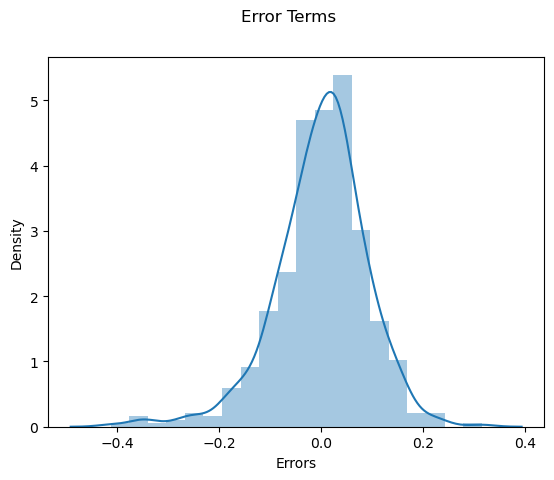

In [90]:
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

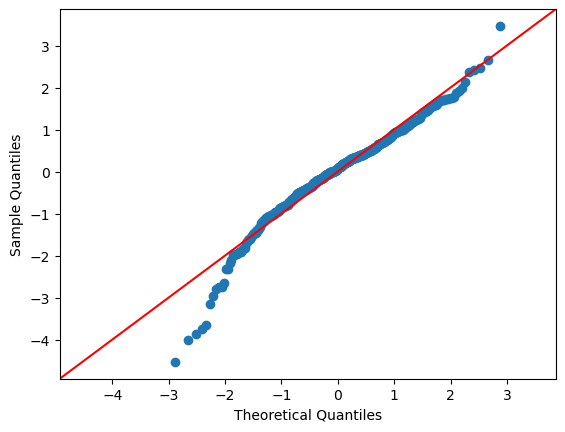

In [91]:
sm.qqplot((residual), fit=True, line='45')
plt.show()

Based on the distplot, we can conclude that error terms are following a normal distribution.

---------------------------------------------------------------------------------------------------------------------------

# Making Predictions

### Scaling df_test dataframe

In [92]:
df_test[df_num] = scaler.transform(df_test[df_num]) # 'df_num' consists of all numerical variables
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Summer,Fall,Winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Misty_Cloudy,Light_Snow_Rain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [93]:
df.describe()

,temp,hum,windspeed,cnt,Summer,Fall,Winter,February,March,April,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Misty_Cloudy,Light_Snow_Rain
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849,0.252055,0.257534,0.243836,0.076712,0.084932,0.082192,...,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,7.506729,14.237589,5.195841,1936.011647,0.434490,0.437576,0.429689,0.266317,0.278971,0.274845,...,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.880615,72.989575,15.625589,5966.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing X_test and y_test 

In [94]:
Y_test = df_test.pop('cnt')
X_test = df_test

In [95]:
#Selecting the variables that were part of final model.
cols = X_train_6.columns

X_test=X_test[cols]

X_test_fin = sm.add_constant(X_test)
X_test_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   const            219 non-null    float64 
 1   yr               219 non-null    category
 2   workingday       219 non-null    category
 3   temp             219 non-null    float64 
 4   windspeed        219 non-null    float64 
 5   Summer           219 non-null    uint8   
 6   Winter           219 non-null    uint8   
 7   September        219 non-null    uint8   
 8   Saturday         219 non-null    uint8   
 9   Misty_Cloudy     219 non-null    uint8   
 10  Light_Snow_Rain  219 non-null    uint8   
dtypes: category(2), float64(3), uint8(6)
memory usage: 8.8 KB


In [96]:
# Making predictions using the final model
Y_pred = req_model.predict(X_test_fin)

---------------------------------------------------------------------------------------------------------------------------

# Model Evaluation

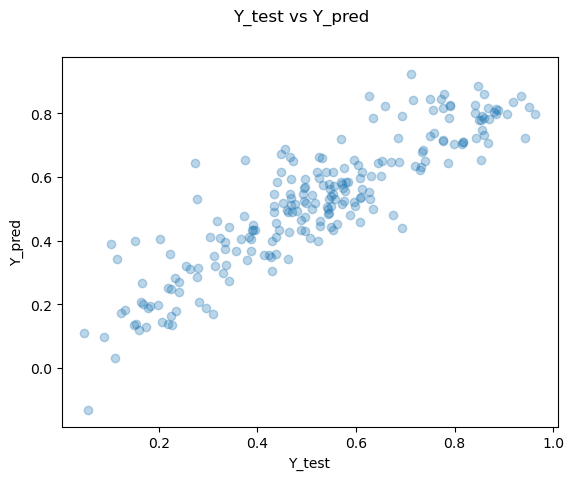

In [97]:
# plotting Y_test and Y_pred to understand the spread
fig = plt.figure()
plt.scatter(Y_test, Y_pred, alpha = 0.3)
fig.suptitle('Y_test vs Y_pred')             
plt.xlabel('Y_test')                          
plt.ylabel('Y_pred') 
plt.show()

### R² Value Calculation for df_test dataframe 

In [98]:
r2 = round(r2_score(Y_test, Y_pred),4)
print(r2)

0.7956


### Adjusted R² Value Calculation for df_test dataframe 

In [99]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
print(adjusted_r2)

0.7858


In [100]:
r2_data = {
    'Measurement': ['R2 Value', 'Adjusted R2 Value'],
    'Train Dataset': [round(req_model.rsquared,4), round(req_model.rsquared_adj,4)],
    'Test Dataset': [r2, adjusted_r2]
}
df1 = pd.DataFrame(r2_data)
df1

,Measurement,Train Dataset,Test Dataset
0,R2 Value,0.8358,0.7956
1,Adjusted R2 Value,0.8325,0.7858


### Calculating RMSE for the selected Model 

In [101]:
RMSE = round(sqrt(mean_squared_error(Y_test, Y_pred)),4)
print(RMSE)

0.0985


### Calculating Mean Absolute Error for the selected Model

In [102]:
MAE = round(mean_absolute_error(Y_test, Y_pred),4)
print(MAE)

0.076


The Root Mean Squared Error value for the test dataset based on final model is 0.098 and Mean Absolute Error is 0.076, which indicates that the model is really good. 